In [245]:
# Import Required Libraries
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [247]:
# Load the dataset
data = pd.read_csv("C:/Users/Acer/Desktop/Task_02/Mall_Customers.csv")

In [249]:
# Preview the dataset
print("Dataset Preview:")
print(data.head())

Dataset Preview:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [251]:
# Preprocessing: Select relevant features for clustering
X = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].values

In [253]:
# Standardize the data for K-means
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

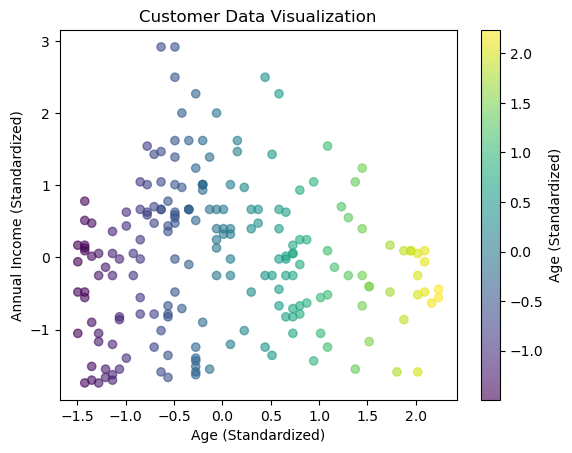

In [255]:
# **Data visualization before clustering**: Plot the first two features
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], alpha=0.6, c=X_scaled[:, 0], cmap='viridis')
plt.colorbar(label='Age (Standardized)')
plt.xlabel('Age (Standardized)')
plt.ylabel('Annual Income (Standardized)')
plt.title('Customer Data Visualization')
plt.show()

In [256]:
# **Elbow Method**: Determine the optimal number of clusters
inertia = []
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

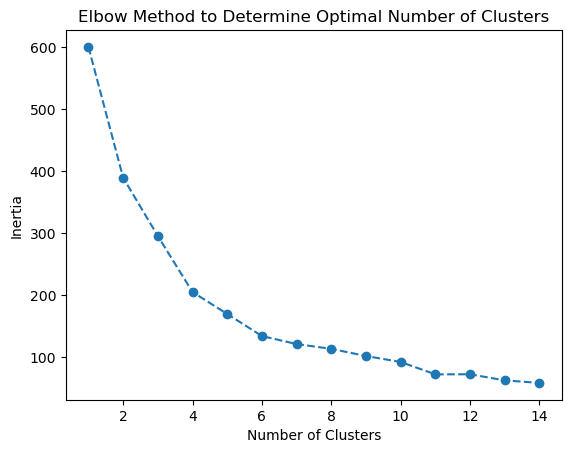

In [257]:
# Plot the inertia for different numbers of clusters
plt.plot(range(1, 15), inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method to Determine Optimal Number of Clusters')
plt.show()

In [259]:
# **K-means clustering with the optimal number of clusters**
kmeans = KMeans(n_clusters=5, random_state=42)  # Replace 5 with the optimal k after using the Elbow Method
kmeans.fit(X_scaled)

KMeans(n_clusters=5, random_state=42)

In [260]:
# Retrieve cluster labels and centroids
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

In [261]:
# Add cluster labels to the dataset
data['Cluster'] = labels  

# Display the average values of each cluster
print("\nCluster Centroids (Feature Means):")
print(data.groupby('Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean())


Cluster Centroids (Feature Means):
               Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                       
0        55.275862           47.620690               41.706897
1        32.875000           86.100000               81.525000
2        25.769231           26.115385               74.846154
3        26.733333           54.311111               40.911111
4        44.387097           89.774194               18.483871


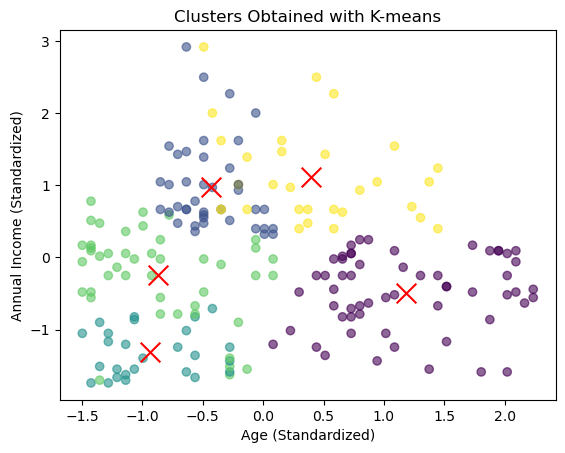

In [262]:
# **Visualization of the resulting clusters**: Plot the first two dimensions
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis', alpha=0.6)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='x')  # Centroids
plt.xlabel('Age (Standardized)')
plt.ylabel('Annual Income (Standardized)')
plt.title('Clusters Obtained with K-means')
plt.show()

In [263]:
# **Evaluation of the results**

print("Cluster Centroids:\n", centroids)
print("\nCluster Labels:\n", labels)


silhouette_avg = silhouette_score(X_scaled, labels)
# Displaying the silhouette score with an explanation
print(f"\nThe silhouette score is {silhouette_avg:.4f}.")
print("A score close to +1 indicates that the clusters are well separated, while a score close to -1 indicates that points are misassigned. A score near 0 means that points are on the boundary between clusters.")

Cluster Centroids:
 [[ 1.17882975 -0.49388609 -0.32971553]
 [-0.42880597  0.97484722  1.21608539]
 [-0.93876351 -1.31473131  0.95680216]
 [-0.86957306 -0.23851652 -0.36060916]
 [ 0.39737911  1.11508909 -1.23126963]]

Cluster Labels:
 [2 2 3 2 2 2 3 2 0 2 0 2 0 2 3 2 3 2 0 2 3 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 3 2 0 2 0 2 0 2 0 3 3 3 0 2 3 0 0 0 0 0 3 0 0 3 0 0 0 3 0 0 3 3 0 0 0 0
 0 3 0 3 3 0 0 3 0 0 3 0 0 3 3 0 0 3 0 3 3 3 0 3 0 3 3 0 0 3 0 3 0 0 0 0 0
 3 3 3 3 3 0 0 0 0 3 3 1 1 3 1 4 1 4 1 4 1 3 1 3 1 4 1 3 1 4 1 3 1 3 1 4 1
 4 1 4 1 4 1 4 1 4 1 4 1 4 1 3 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4
 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1]

The silhouette score is 0.4085.
A score close to +1 indicates that the clusters are well separated, while a score close to -1 indicates that points are misassigned. A score near 0 means that points are on the boundary between clusters.
